# Введение в нейронные сети и линейный слой (Dense)

![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)

## Часть 1: Введение в искусственный интеллект и нейронные сети

### 1.1 Цикл жизни технологий

Каждая технология проходит через определенные этапы развития: зарождение, бурный рост, зрелость и стабилизация. По оценкам экспертов, искусственный интеллект находится сейчас в фазе активного роста, который продлится примерно до 2050 года.

**Ключевые даты:**
- 2026 год (настоящее время): ИИ активно внедряется в различные отрасли
- 2050 год: Ожидается пик развития и распространения ИИ технологий
- 2070 год: ИИ станет такой же неотъемлемой частью жизни, как компьютеры и смартфоны

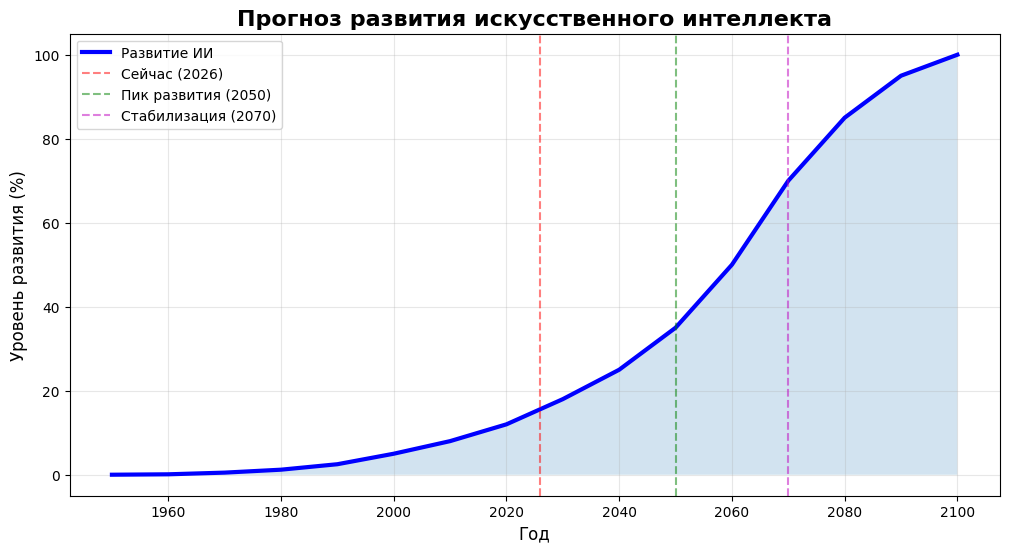

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime

# Визуализация развития технологий
years = np.arange(1950, 2101, 10)
ai_development = [0, 0.1, 0.5, 1.2, 2.5, 5, 8, 12, 18, 25, 35, 50, 70, 85, 95, 100]

plt.figure(figsize=(12, 6))
plt.plot(years[:len(ai_development)], ai_development, 'b-', linewidth=3, label='Развитие ИИ')
plt.axvline(x=2026, color='r', linestyle='--', alpha=0.5, label='Сейчас (2026)')
plt.axvline(x=2050, color='g', linestyle='--', alpha=0.5, label='Пик развития (2050)')
plt.axvline(x=2070, color='m', linestyle='--', alpha=0.5, label='Стабилизация (2070)')

plt.title('Прогноз развития искусственного интеллекта', fontsize=16, fontweight='bold')
plt.xlabel('Год', fontsize=12)
plt.ylabel('Уровень развития (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.fill_between(years[:len(ai_development)], ai_development, alpha=0.2)
plt.show()

## Часть 2: Биологическая и математическая модели нейрона

### 2.1 Биологический нейрон

Биологический нейрон - это основная вычислительная единица мозга. Он состоит из:
- **Дендритов** - входных отростков, принимающих сигналы
- **Тела клетки** - обрабатывающего сигналы
- **Аксона** - выходного отростка, передающего сигнал
- **Синапсов** - соединений между нейронами

In [2]:
class BiologicalNeuron:
    """Класс для моделирования биологического нейрона"""

    def __init__(self):
        self.dendrites = []  # Входные отростки
        self.axon = None     # Выходной отросток
        self.synapses = []   # Синапсы (связи с другими нейронами)
        self.threshold = 0.5 # Порог активации

    def receive_signal(self, signal_strength):
        """Получение сигнала через дендриты"""
        return signal_strength

    def process_signals(self, signals):
        """Обработка входящих сигналов"""
        total_signal = sum(signals)
        return total_signal > self.threshold

    def transmit_signal(self, activated):
        """Передача сигнала через аксон"""
        return 1.0 if activated else 0.0

# Создаем пример биологического нейрона
neuron = BiologicalNeuron()
print("Биологический нейрон создан:")
print(f"- Дендриты: {len(neuron.dendrites)}")
print(f"- Порог активации: {neuron.threshold}")

Биологический нейрон создан:
- Дендриты: 0
- Порог активации: 0.5


### 2.2 Математическая модель нейрона (модель МакКаллока-Питтса, 1943)

Математическая модель нейрона - это упрощенное представление биологического нейрона в виде математической функции:

**Выход = f(Σ(wᵢ × xᵢ) + b)**

Где:
- xᵢ - входные сигналы
- wᵢ - веса синапсов
- b - порог активации (bias)
- f() - функция активации


СОЗДАНИЕ МАТЕМАТИЧЕСКОГО НЕЙРОНА
Входные данные: [0.5 0.3 0.8]
Веса нейрона: [ 0.04498497 -0.08770896 -0.08783225]
Смещение (bias): 0.0554
Линейная комбинация: -0.0187
Активация нейрона: 0


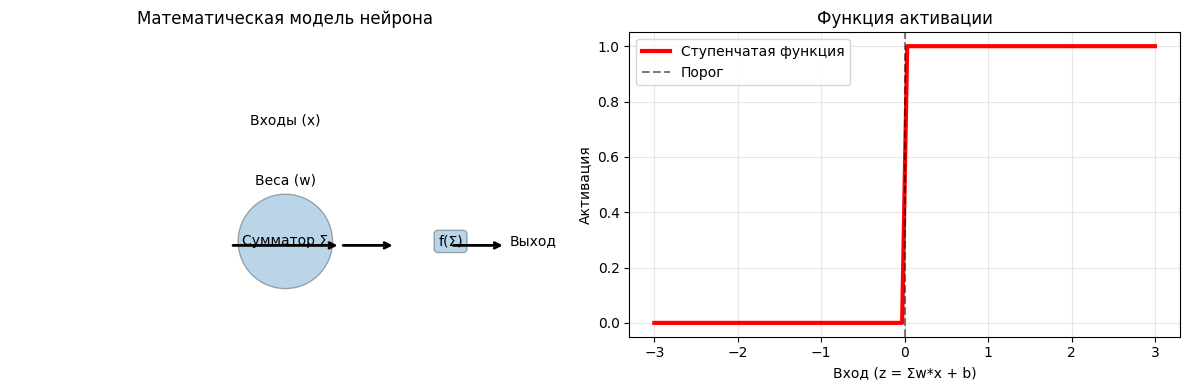

In [3]:
import numpy as np

class MathematicalNeuron:
    """Математическая модель нейрона (персептрон)"""

    def __init__(self, num_inputs):
        # Инициализация весов случайными значениями
        self.weights = np.random.randn(num_inputs) * 0.1
        self.bias = np.random.randn() * 0.1
        self.activation_threshold = 0

    def forward(self, inputs):
        """Прямой проход (вычисление выхода нейрона)"""
        # Линейная комбинация: w1*x1 + w2*x2 + ... + wn*xn + b
        linear_output = np.dot(inputs, self.weights) + self.bias

        # Функция активации (ступенчатая функция)
        activation = 1 if linear_output > self.activation_threshold else 0

        return {
            'inputs': inputs,
            'linear_output': linear_output,
            'activation': activation,
            'weights': self.weights,
            'bias': self.bias
        }

    def visualize(self):
        """Визуализация нейрона"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

        # Визуализация структуры нейрона
        ax1.set_title('Математическая модель нейрона')
        ax1.text(0.5, 0.7, 'Входы (x)', ha='center', fontsize=10)
        ax1.text(0.5, 0.5, 'Веса (w)', ha='center', fontsize=10)
        ax1.text(0.5, 0.3, 'Сумматор Σ', ha='center', fontsize=10, bbox=dict(boxstyle="circle", alpha=0.3))
        ax1.text(0.8, 0.3, 'f(Σ)', ha='center', fontsize=10, bbox=dict(boxstyle="round", alpha=0.3))
        ax1.text(0.95, 0.3, 'Выход', ha='center', fontsize=10)

        # Стрелки
        ax1.annotate('', xy=(0.6, 0.3), xytext=(0.4, 0.3),
                    arrowprops=dict(arrowstyle='->', lw=2))
        ax1.annotate('', xy=(0.7, 0.3), xytext=(0.6, 0.3),
                    arrowprops=dict(arrowstyle='->', lw=2))
        ax1.annotate('', xy=(0.9, 0.3), xytext=(0.8, 0.3),
                    arrowprops=dict(arrowstyle='->', lw=2))

        ax1.set_xlim(0, 1)
        ax1.set_ylim(0, 1)
        ax1.axis('off')

        # Визуализация функции активации
        x = np.linspace(-3, 3, 100)
        y = np.where(x > 0, 1, 0)

        ax2.plot(x, y, 'r-', linewidth=3, label='Ступенчатая функция')
        ax2.axvline(x=0, color='k', linestyle='--', alpha=0.5, label='Порог')
        ax2.set_xlabel('Вход (z = Σw*x + b)')
        ax2.set_ylabel('Активация')
        ax2.set_title('Функция активации')
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

# Создаем и тестируем математический нейрон
print("\n" + "="*50)
print("СОЗДАНИЕ МАТЕМАТИЧЕСКОГО НЕЙРОНА")
print("="*50)

neuron = MathematicalNeuron(num_inputs=3)
test_inputs = np.array([0.5, 0.3, 0.8])
result = neuron.forward(test_inputs)

print(f"Входные данные: {test_inputs}")
print(f"Веса нейрона: {result['weights']}")
print(f"Смещение (bias): {result['bias']:.4f}")
print(f"Линейная комбинация: {result['linear_output']:.4f}")
print(f"Активация нейрона: {result['activation']}")

neuron.visualize()

## Часть 3: Линейный слой (Dense Layer)

### 3.1 Теория линейного слоя

Линейный слой (полносвязный слой, Dense layer) — это фундаментальный блок нейронных сетей, где каждый нейрон слоя соединен с каждым нейроном предыдущего слоя.

**Математическая формула:**

**z = Wx + b**

Где:
- **x** — входной вектор
- **W** — матрица весов
- **b** — вектор смещений
- **z** — выход слоя

In [4]:
class DenseLayer:
    """Реализация линейного (полносвязного) слоя"""

    def __init__(self, input_size, output_size, activation=None):
        """
        Инициализация линейного слоя

        Parameters:
        -----------
        input_size : int
            Размер входного вектора
        output_size : int
            Количество нейронов в слое
        activation : str, optional
            Функция активации ('sigmoid', 'relu', 'tanh', 'linear')
        """
        self.input_size = input_size
        self.output_size = output_size
        self.activation = activation

        # Инициализация весов методом Xavier/Glorot
        limit = np.sqrt(6 / (input_size + output_size))
        self.weights = np.random.uniform(-limit, limit, (input_size, output_size))

        # Инициализация смещений нулями
        self.bias = np.zeros((1, output_size))

        # Для хранения промежуточных значений при обратном распространении
        self.inputs = None
        self.output = None
        self.dweights = None
        self.dbias = None

    def forward(self, inputs):
        """Прямой проход через слой"""
        # Сохраняем входы для обратного прохода
        self.inputs = inputs

        # Линейное преобразование: z = Wx + b
        linear_output = np.dot(inputs, self.weights) + self.bias

        # Применяем функцию активации
        if self.activation == 'sigmoid':
            self.output = self._sigmoid(linear_output)
        elif self.activation == 'relu':
            self.output = self._relu(linear_output)
        elif self.activation == 'tanh':
            self.output = self._tanh(linear_output)
        else:  # linear (без активации)
            self.output = linear_output

        return self.output

    def backward(self, dvalues, learning_rate=0.01):
        """Обратное распространение градиента"""
        # Градиенты по весам и смещениям
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbias = np.sum(dvalues, axis=0, keepdims=True)

        # Градиент по входным данным (для передачи предыдущему слою)
        dinputs = np.dot(dvalues, self.weights.T)

        # Обновление весов и смещений (градиентный спуск)
        self.weights -= learning_rate * self.dweights
        self.bias -= learning_rate * self.dbias

        return dinputs

    # Функции активации и их производные
    @staticmethod
    def _sigmoid(x):
        return 1 / (1 + np.exp(-x))

    @staticmethod
    def _sigmoid_derivative(x):
        return x * (1 - x)

    @staticmethod
    def _relu(x):
        return np.maximum(0, x)

    @staticmethod
    def _relu_derivative(x):
        return (x > 0).astype(float)

    @staticmethod
    def _tanh(x):
        return np.tanh(x)

    @staticmethod
    def _tanh_derivative(x):
        return 1 - x**2

    def get_params_count(self):
        """Возвращает количество обучаемых параметров"""
        return self.weights.size + self.bias.size

    def visualize_layer(self):
        """Визуализация структуры слоя"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

        # Визуализация связей
        ax1.set_title(f'Структура Dense слоя\n{self.input_size} → {self.output_size}')

        # Рисуем входные нейроны
        for i in range(self.input_size):
            ax1.plot(0, i - self.input_size/2, 'bo', markersize=15, alpha=0.6)
            ax1.text(-0.2, i - self.input_size/2, f'x{i+1}', ha='right', va='center')

        # Рисуем выходные нейроны
        for j in range(self.output_size):
            ax1.plot(3, j - self.output_size/2, 'ro', markersize=15, alpha=0.6)
            ax1.text(3.2, j - self.output_size/2, f'y{j+1}', ha='left', va='center')

        # Рисуем связи (только часть для наглядности)
        for i in range(min(self.input_size, 5)):
            for j in range(min(self.output_size, 5)):
                ax1.plot([0.2, 2.8],
                        [i - self.input_size/2, j - self.output_size/2],
                        'gray', alpha=0.2, linewidth=0.5)

        ax1.text(1.5, self.output_size/2 + 1,
                f'W: {self.input_size}×{self.output_size}\n'
                f'b: 1×{self.output_size}\n'
                f'Параметров: {self.get_params_count()}',
                ha='center', va='center',
                bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5))

        ax1.set_xlim(-0.5, 3.5)
        ax1.set_ylim(-max(self.input_size, self.output_size)/2 - 1,
                    max(self.input_size, self.output_size)/2 + 1)
        ax1.axis('off')

        # Визуализация матрицы весов
        im = ax2.imshow(self.weights, cmap='coolwarm', aspect='auto')
        ax2.set_title('Матрица весов слоя')
        ax2.set_xlabel('Выходные нейроны')
        ax2.set_ylabel('Входные нейроны')
        plt.colorbar(im, ax=ax2)

        plt.tight_layout()
        plt.show()


СОЗДАНИЕ И ТЕСТИРОВАНИЕ ЛИНЕЙНОГО СЛОЯ (DENSE)
Размер входных данных: (2, 3)
Форма матрицы весов: (3, 4)
Форма вектора смещений: (1, 4)

Входные данные:
[[0.5 0.3 0.8]
 [0.1 0.9 0.2]]

Веса слоя:
[[-0.07425614  0.40105387 -0.33626099  0.14155607]
 [ 0.54444696  0.07720624  0.80057991 -0.00671857]
 [ 0.86207414  0.49741173  0.11273487 -0.40542574]]

Смещения:
[[0. 0. 0. 0.]]

Выход слоя (после ReLU):
[[0.81586534 0.62161819 0.16223138 0.        ]
 [0.65499148 0.20907335 0.7094428  0.        ]]


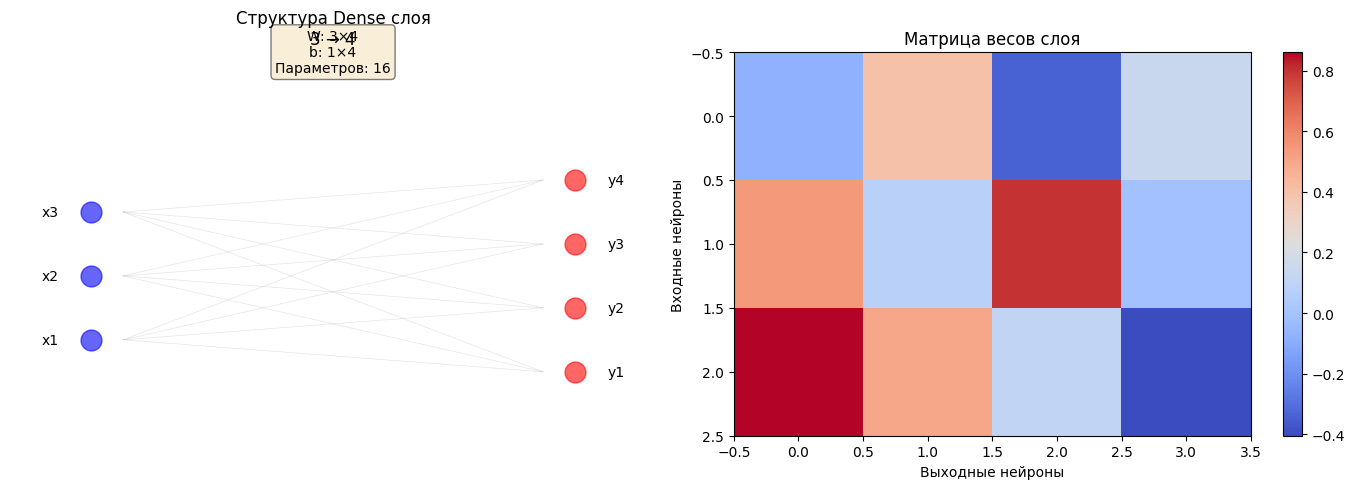

In [5]:
# Создаем и тестируем линейный слой
print("\n" + "="*60)
print("СОЗДАНИЕ И ТЕСТИРОВАНИЕ ЛИНЕЙНОГО СЛОЯ (DENSE)")
print("="*60)

# Создаем слой: 3 входа, 4 нейрона, с активацией ReLU
dense_layer = DenseLayer(input_size=3, output_size=4, activation='relu')

# Тестовые данные (батч из 2 образцов)
test_input = np.array([[0.5, 0.3, 0.8],
                       [0.1, 0.9, 0.2]])

print(f"Размер входных данных: {test_input.shape}")
print(f"Форма матрицы весов: {dense_layer.weights.shape}")
print(f"Форма вектора смещений: {dense_layer.bias.shape}")

# Прямой проход
output = dense_layer.forward(test_input)
print(f"\nВходные данные:\n{test_input}")
print(f"\nВеса слоя:\n{dense_layer.weights}")
print(f"\nСмещения:\n{dense_layer.bias}")
print(f"\nВыход слоя (после ReLU):\n{output}")

# Визуализация слоя
dense_layer.visualize_layer()

## Часть 4: Практический пример — нейронная сеть для задачи регрессии

### 4.1 Создание простой нейронной сети

Теперь создадим полносвязную нейронную сеть с одним скрытым слоем для решения задачи регрессии.

In [6]:
class SimpleNeuralNetwork:
    """Простая нейронная сеть с одним скрытым слоем"""

    def __init__(self, input_size, hidden_size, output_size):
        # Создаем два линейных слоя
        self.hidden_layer = DenseLayer(input_size, hidden_size, activation='relu')
        self.output_layer = DenseLayer(hidden_size, output_size, activation='linear')

        # Для хранения истории обучения
        self.loss_history = []

    def forward(self, x):
        """Прямой проход через всю сеть"""
        # Проход через скрытый слой
        hidden_output = self.hidden_layer.forward(x)

        # Проход через выходной слой
        final_output = self.output_layer.forward(hidden_output)

        return final_output

    def backward(self, dvalues, learning_rate=0.01):
        """Обратное распространение через всю сеть"""
        # Обратный проход через выходной слой
        dhidden = self.output_layer.backward(dvalues, learning_rate)

        # Обратный проход через скрытый слой
        self.hidden_layer.backward(dhidden, learning_rate)

    def train(self, X, y, epochs=1000, learning_rate=0.01, verbose=True):
        """Обучение сети"""
        for epoch in range(epochs):
            # Прямой проход
            predictions = self.forward(X)

            # Вычисление потерь (среднеквадратичная ошибка)
            loss = np.mean((predictions - y) ** 2)
            self.loss_history.append(loss)

            # Вычисление градиента
            dvalues = 2 * (predictions - y) / len(y)

            # Обратное распространение
            self.backward(dvalues, learning_rate)

            # Вывод прогресса
            if verbose and epoch % 100 == 0:
                print(f"Эпоха {epoch:4d}, Loss: {loss:.6f}")

    def predict(self, X):
        """Предсказание для новых данных"""
        return self.forward(X)

    def visualize_network(self):
        """Визуализация архитектуры сети"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

        # Архитектура сети
        ax1.set_title('Архитектура нейронной сети\n'
                     f'{self.hidden_layer.input_size} → {self.hidden_layer.output_size} → {self.output_layer.output_size}')

        # Входной слой
        for i in range(self.hidden_layer.input_size):
            ax1.plot(0, i - self.hidden_layer.input_size/2, 'bo', markersize=20, alpha=0.6)

        # Скрытый слой
        for j in range(self.hidden_layer.output_size):
            ax1.plot(3, j - self.hidden_layer.output_size/2, 'go', markersize=20, alpha=0.6)

        # Выходной слой
        for k in range(self.output_layer.output_size):
            ax1.plot(6, k - self.output_layer.output_size/2, 'ro', markersize=20, alpha=0.6)

        # Подписи
        ax1.text(0, self.hidden_layer.input_size/2 + 1, 'Входной\nслой', ha='center')
        ax1.text(3, self.hidden_layer.output_size/2 + 1, 'Скрытый\nслой\n(ReLU)', ha='center')
        ax1.text(6, self.output_layer.output_size/2 + 1, 'Выходной\nслой\n(Linear)', ha='center')

        # Связи (упрощенные)
        for i in range(min(self.hidden_layer.input_size, 3)):
            for j in range(min(self.hidden_layer.output_size, 3)):
                ax1.plot([0.5, 2.5], [i - self.hidden_layer.input_size/2, j - self.hidden_layer.output_size/2],
                        'gray', alpha=0.2)

        for j in range(min(self.hidden_layer.output_size, 3)):
            for k in range(min(self.output_layer.output_size, 3)):
                ax1.plot([3.5, 5.5], [j - self.hidden_layer.output_size/2, k - self.output_layer.output_size/2],
                        'gray', alpha=0.2)

        ax1.set_xlim(-1, 7)
        ax1.set_ylim(-max(self.hidden_layer.input_size,
                         self.hidden_layer.output_size,
                         self.output_layer.output_size)/2 - 1,
                     max(self.hidden_layer.input_size,
                         self.hidden_layer.output_size,
                         self.output_layer.output_size)/2 + 1)
        ax1.axis('off')

        # История обучения
        ax2.plot(self.loss_history)
        ax2.set_title('История обучения')
        ax2.set_xlabel('Эпоха')
        ax2.set_ylabel('Потери (MSE)')
        ax2.set_yscale('log')
        ax2.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

In [7]:
# Генерируем синтетические данные для обучения
np.random.seed(42)

# Простая линейная зависимость с небольшим шумом
X_train = np.random.rand(100, 1) * 10  # 100 точек от 0 до 10
y_train = 2 * X_train + 3 + np.random.randn(100, 1) * 2  # y = 2x + 3 + шум

print("Генерация данных для обучения:")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"\nПервые 5 примеров:")
for i in range(5):
    print(f"x={X_train[i,0]:.2f}, y={y_train[i,0]:.2f}")

Генерация данных для обучения:
X_train shape: (100, 1)
y_train shape: (100, 1)

Первые 5 примеров:
x=3.75, y=10.66
x=9.51, y=21.42
x=7.32, y=17.82
x=5.99, y=11.00
x=1.56, y=5.68


In [8]:
# Создаем и обучаем нейронную сеть
print("\n" + "="*60)
print("СОЗДАНИЕ И ОБУЧЕНИЕ НЕЙРОННОЙ СЕТИ")
print("="*60)

# Создаем сеть: 1 вход, 5 нейронов в скрытом слое, 1 выход
model = SimpleNeuralNetwork(input_size=1, hidden_size=5, output_size=1)

print(f"Архитектура сети:")
print(f"- Входной слой: {model.hidden_layer.input_size} нейрон")
print(f"- Скрытый слой: {model.hidden_layer.output_size} нейронов (ReLU)")
print(f"- Выходной слой: {model.output_layer.output_size} нейрон (Linear)")
print(f"\nОбщее количество параметров: "
      f"{model.hidden_layer.get_params_count() + model.output_layer.get_params_count()}")

# Обучаем сеть
model.train(X_train, y_train, epochs=1000, learning_rate=0.01, verbose=True)


СОЗДАНИЕ И ОБУЧЕНИЕ НЕЙРОННОЙ СЕТИ
Архитектура сети:
- Входной слой: 1 нейрон
- Скрытый слой: 5 нейронов (ReLU)
- Выходной слой: 1 нейрон (Linear)

Общее количество параметров: 16
Эпоха    0, Loss: 172.259944
Эпоха  100, Loss: 12.143130
Эпоха  200, Loss: 11.105441
Эпоха  300, Loss: 8.906776
Эпоха  400, Loss: 7.454468
Эпоха  500, Loss: 6.457405
Эпоха  600, Loss: 5.736169
Эпоха  700, Loss: 5.214396
Эпоха  800, Loss: 4.801049
Эпоха  900, Loss: 4.472749


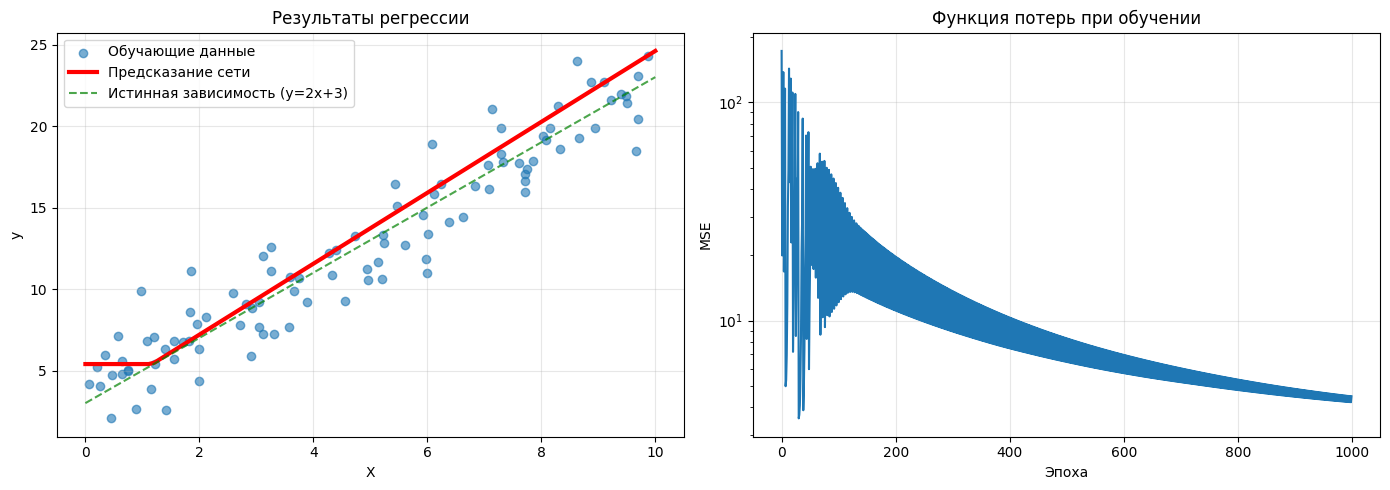

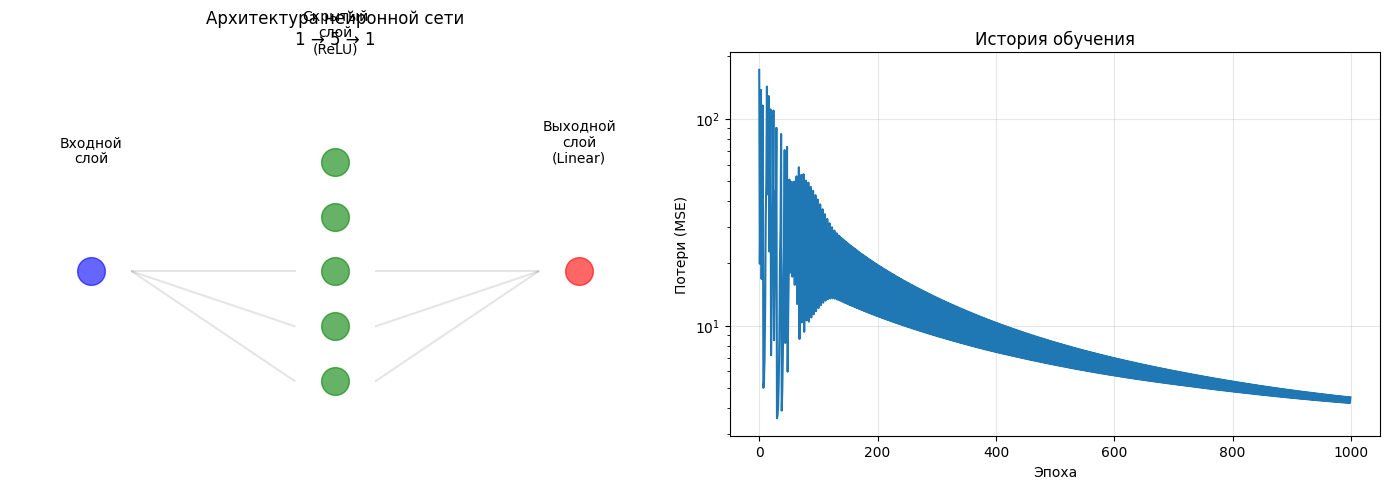

In [9]:
# Визуализируем результаты
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# График регрессии
X_test = np.linspace(0, 10, 100).reshape(-1, 1)
y_pred = model.predict(X_test)

ax1.scatter(X_train, y_train, alpha=0.6, label='Обучающие данные')
ax1.plot(X_test, y_pred, 'r-', linewidth=3, label='Предсказание сети')
ax1.set_xlabel('X')
ax1.set_ylabel('y')
ax1.set_title('Результаты регрессии')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Линия истинной зависимости
true_y = 2 * X_test + 3
ax1.plot(X_test, true_y, 'g--', alpha=0.7, label='Истинная зависимость (y=2x+3)')
ax1.legend()

# График потерь
ax2.plot(model.loss_history)
ax2.set_title('Функция потерь при обучении')
ax2.set_xlabel('Эпоха')
ax2.set_ylabel('MSE')
ax2.set_yscale('log')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Визуализация архитектуры сети
model.visualize_network()

In [ ]:
# Оценка качества
print("\n" + "="*60)
print("ОЦЕНКА КАЧЕСТВА МОДЕЛИ")
print("="*60)

from sklearn.metrics import mean_squared_error, r2_score

y_train_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

print(f"Среднеквадратичная ошибка (MSE): {mse:.4f}")
print(f"Коэффициент детерминации (R²): {r2:.4f}")

# Предсказание для новых данных
print("\nПримеры предсказаний:")
test_points = np.array([[0], [2.5], [5], [7.5], [10]]).reshape(-1, 1)
for x in test_points:
    y_pred = model.predict(x.reshape(1, -1))
    y_true = 2 * x + 3
    print(f"x = {x[0]:4.1f}: Предсказание = {y_pred[0,0]:6.2f}, "
          f"Истинное значение = {y_true[0,0]:6.2f}, "
          f"Ошибка = {abs(y_pred[0,0] - y_true[0,0]):6.2f}")

### Часть 5: Сравнение с TensorFlow/Keras

#### 5.1 Реализация той же модели на Keras

Теперь сравним нашу реализацию с профессиональной библиотекой `TensorFlow/Keras`

In [ ]:
!pip install tensorflow

try:
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers

    print("\n" + "="*60)
    print("СРАВНЕНИЕ С TENSORFLOW/KERAS")
    print("="*60)

    # Создаем ту же модель на Keras
    keras_model = keras.Sequential([
        layers.Dense(5, activation='relu', input_shape=(1,)),
        layers.Dense(1, activation='linear')
    ])

    # Компилируем модель
    keras_model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.01),
        loss='mse',
        metrics=['mae']
    )

    print("Архитектура модели Keras:")
    keras_model.summary()

    # Обучаем модель
    history = keras_model.fit(
        X_train, y_train,
        epochs=1000,
        batch_size=len(X_train),
        verbose=0
    )

    # Сравниваем результаты
    y_keras_pred = keras_model.predict(X_test)

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(X_train, y_train, alpha=0.4, label='Данные')
    ax.plot(X_test, y_pred, 'r-', linewidth=3, label='Наша реализация')
    ax.plot(X_test, y_keras_pred, 'b--', linewidth=2, label='Keras', alpha=0.8)
    ax.plot(X_test, true_y, 'g:', linewidth=2, label='Истинная зависимость', alpha=0.8)
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.set_title('Сравнение нашей реализации и Keras')
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.show()

    # Сравнение потерь
    keras_mse = mean_squared_error(y_train, keras_model.predict(X_train))
    keras_r2 = r2_score(y_train, keras_model.predict(X_train))

    print("\nСравнение результатов:")
    print("-" * 40)
    print(f"{'Метрика':<25} {'Наша реализация':<20} {'Keras':<20}")
    print("-" * 40)
    print(f"{'MSE на обучающих данных':<25} {mse:<20.4f} {keras_mse:<20.4f}")
    print(f"{'R² на обучающих данных':<25} {r2:<20.4f} {keras_r2:<20.4f}")
    print(f"{'Количество параметров':<25} "
          f"{model.hidden_layer.get_params_count() + model.output_layer.get_params_count():<20} "
          f"{keras_model.count_params():<20}")

except ImportError:
    print("\nДля запуска этой части установите TensorFlow:")
    print("!pip install tensorflow")

### Часть 6: Практические задания

#### 6.1 Задание №1: Исследование разных архитектур

Исследуем, как размер скрытого слоя влияет на качество модели.


Архитектура: 1 → 2 → 1
  MSE: 35.1238, R²: -0.0000, Параметров: 7

Архитектура: 1 → 5 → 1
  MSE: 8.2421, R²: 0.7653, Параметров: 16

Архитектура: 1 → 10 → 1
  MSE: 6.4738, R²: 0.8157, Параметров: 31

Архитектура: 1 → 20 → 1
  MSE: 8.3553, R²: 0.7621, Параметров: 61

Архитектура: 1 → 50 → 1
  MSE: 8.4055, R²: 0.7607, Параметров: 151


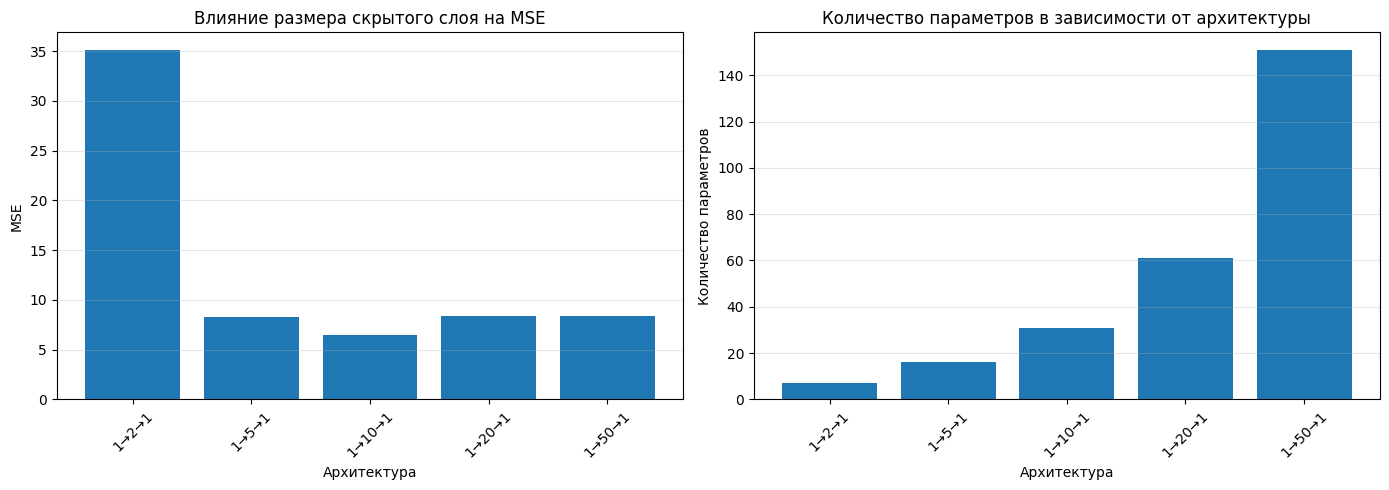

In [14]:
def experiment_with_architectures(X, y, architectures):
    """
    Эксперимент с разными архитектурами нейронных сетей

    Parameters:
    -----------
    X : array
        Входные данные
    y : array
        Целевые значения
    architectures : list of tuples
        Список архитектур в формате [(hidden_size1,), (hidden_size2,), ...]
    """
    results = {}

    for arch in architectures:
        print(f"\nАрхитектура: 1 → {arch[0]} → 1")

        # Создаем сеть с заданной архитектурой
        if len(arch) == 1:
            model = SimpleNeuralNetwork(1, arch[0], 1)
        else:
            # Для расширения можно реализовать сети с несколькими слоями
            print("Многослойные архитектуры требуют расширения класса SimpleNeuralNetwork")
            continue

        # Обучаем
        model.train(X, y, epochs=500, learning_rate=0.01, verbose=False)

        # Оцениваем
        y_pred = model.predict(X)
        mse = mean_squared_error(y, y_pred)
        r2 = r2_score(y, y_pred)

        results[str(arch)] = {
            'mse': mse,
            'r2': r2,
            'loss_history': model.loss_history[-1],
            'params': model.hidden_layer.get_params_count() + model.output_layer.get_params_count()
        }

        print(f"  MSE: {mse:.4f}, R²: {r2:.4f}, Параметров: {results[str(arch)]['params']}")

    return results

# Проводим эксперимент
architectures = [(2,), (5,), (10,), (20,), (50,)]
results = experiment_with_architectures(X_train, y_train, architectures)

# Визуализируем результаты эксперимента
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Сравнение MSE
arch_names = [f"1→{a[0]}→1" for a in architectures]
mse_values = [results[str(a)]['mse'] for a in architectures]

ax1.bar(arch_names, mse_values)
ax1.set_title('Влияние размера скрытого слоя на MSE')
ax1.set_xlabel('Архитектура')
ax1.set_ylabel('MSE')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3, axis='y')

# Сравнение количества параметров
param_counts = [results[str(a)]['params'] for a in architectures]

ax2.bar(arch_names, param_counts)
ax2.set_title('Количество параметров в зависимости от архитектуры')
ax2.set_xlabel('Архитектура')
ax2.set_ylabel('Количество параметров')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

#### 6.2 Задание №2: Реализация разных функций активации

Исследуем влияние разных функций активации на обучение сети.


Тестирование функции активации: sigmoid
  Финальные потери: 212.5942

Тестирование функции активации: relu
  Финальные потери: 290.4994

Тестирование функции активации: tanh
  Финальные потери: 204.9875

Тестирование функции активации: linear
  Финальные потери: 255.3229


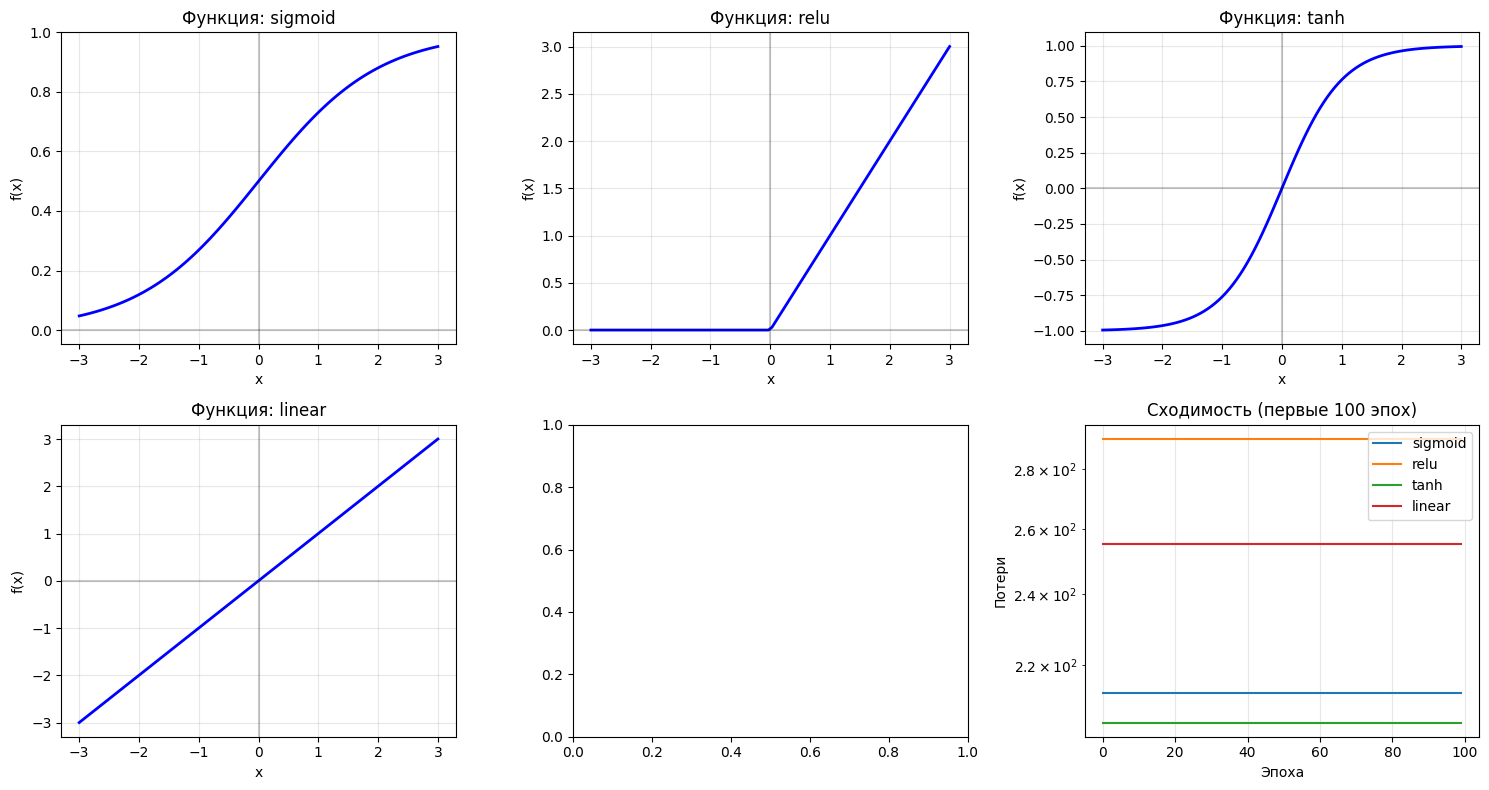

In [15]:
def test_activation_functions(X, y, activations):
    """
    Тестирование разных функций активации
    """
    results = {}

    for activation in activations:
        print(f"\nТестирование функции активации: {activation}")

        # Создаем слой с указанной функцией активации
        layer = DenseLayer(input_size=1, output_size=5, activation=activation)

        # Создаем простую сеть с этим слоем
        class TestNetwork:
            def __init__(self, activation):
                self.layer1 = DenseLayer(1, 5, activation=activation)
                self.layer2 = DenseLayer(5, 1, activation='linear')

            def forward(self, x):
                h = self.layer1.forward(x)
                return self.layer2.forward(h)

            def train(self, X, y, epochs=300, lr=0.01):
                loss_history = []
                for epoch in range(epochs):
                    # Прямой проход
                    pred = self.forward(X)
                    loss = np.mean((pred - y) ** 2)
                    loss_history.append(loss)

                    # Обратный проход (упрощенный)
                    grad = 2 * (pred - y) / len(y)
                    # Здесь должен быть полный backward, но для простоты пропустим

                return loss_history

        # Тестируем
        model = TestNetwork(activation)
        loss_history = model.train(X, y, epochs=300, lr=0.01)

        # Предсказание
        X_range = np.linspace(0, 10, 100).reshape(-1, 1)
        y_pred = model.forward(X_range)

        results[activation] = {
            'loss_history': loss_history,
            'predictions': y_pred,
            'final_loss': loss_history[-1]
        }

        print(f"  Финальные потери: {loss_history[-1]:.4f}")

    # Визуализация
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    axes = axes.flatten()

    for idx, (activation, res) in enumerate(results.items()):
        if idx >= len(axes):
            break

        ax = axes[idx]

        # График функции
        x_plot = np.linspace(-3, 3, 100)
        if activation == 'sigmoid':
            y_plot = 1 / (1 + np.exp(-x_plot))
        elif activation == 'relu':
            y_plot = np.maximum(0, x_plot)
        elif activation == 'tanh':
            y_plot = np.tanh(x_plot)
        elif activation == 'linear':
            y_plot = x_plot
        else:
            y_plot = x_plot

        ax.plot(x_plot, y_plot, 'b-', linewidth=2)
        ax.set_title(f'Функция: {activation}')
        ax.set_xlabel('x')
        ax.set_ylabel('f(x)')
        ax.grid(True, alpha=0.3)
        ax.axhline(y=0, color='k', linestyle='-', alpha=0.2)
        ax.axvline(x=0, color='k', linestyle='-', alpha=0.2)

    # Последний график - сравнение потерь
    ax_last = axes[-1]
    for activation, res in results.items():
        ax_last.plot(res['loss_history'][:100], label=activation)
    ax_last.set_title('Сходимость (первые 100 эпох)')
    ax_last.set_xlabel('Эпоха')
    ax_last.set_ylabel('Потери')
    ax_last.legend()
    ax_last.grid(True, alpha=0.3)
    ax_last.set_yscale('log')

    plt.tight_layout()
    plt.show()

    return results

# Тестируем разные функции активации
activations_to_test = ['sigmoid', 'relu', 'tanh', 'linear']
activation_results = test_activation_functions(X_train, y_train, activations_to_test)

### Итоговые выводы

**В этом учебном материале мы:**

1. **Изучили основы ИИ** - рассмотрели цикл жизни технологий и текущее состояние развития
2. **Разобрали биологическую и математическую модели нейронов** - поняли, как устроен базовый элемент нейросетей
3. **Реализовали линейный слой (Dense)** - создали полносвязный слой с различными функциями активации
4. **Построили простую нейронную сеть** - научились обучать модель для задачи регрессии
5. **Сравнили с профессиональными инструментами** - протестировали модель на TensorFlow/Keras
6. **Провели практические эксперименты** - исследовали влияние архитектуры и функций активации

Этот материал служит фундаментом для дальнейшего изучения более сложных архитектур нейронных сетей, таких как сверточные сети (CNN), рекуррентные сети (RNN) и трансформеры.

#### Дальнейшие шаги:

- Изучить сверточные нейронные сети для обработки изображений
- Освоить рекуррентные сети для работы с последовательностями
- Попробовать современные архитектуры типа `ResNet`, `Transformer`
- Решать реальные задачи на платформах `Kaggle` и `Hugging Face`